## Getting Started

In [1]:
import torch
import numpy as np

In [2]:
# An uninitialized tensor
x = torch.Tensor(5, 3)
print(x)


 0.0000e+00  0.0000e+00 -1.8290e+05
 4.5577e-41 -1.8439e+05  4.5577e-41
 1.5290e-38  0.0000e+00  1.5290e-38
 0.0000e+00 -1.8792e+11  4.5577e-41
-1.8163e+11  4.5577e-41  3.6448e-42
[torch.FloatTensor of size 5x3]



In [3]:
# An  initialized tensor
x = torch.rand(5, 3)
print(x)


 0.7307  0.7168  0.2990
 0.2871  0.9706  0.8474
 0.5712  0.0424  0.6053
 0.0544  0.0327  0.8164
 0.1745  0.3279  0.0154
[torch.FloatTensor of size 5x3]



In [4]:
print(x.size())

torch.Size([5, 3])


In [5]:
# Addition
y = torch.rand(5, 3)
print(torch.add(x, y))

result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)

y.add_(x)
# The _ post-fix is used for in-place operation i.e. they will mutate the called variable (y in this case)
print(y)


 1.4275  1.6492  0.7701
 0.8377  1.6800  1.6266
 0.7130  0.5183  1.1383
 0.3033  0.1930  1.1273
 0.4310  1.0397  0.6819
[torch.FloatTensor of size 5x3]


 1.4275  1.6492  0.7701
 0.8377  1.6800  1.6266
 0.7130  0.5183  1.1383
 0.3033  0.1930  1.1273
 0.4310  1.0397  0.6819
[torch.FloatTensor of size 5x3]


 1.4275  1.6492  0.7701
 0.8377  1.6800  1.6266
 0.7130  0.5183  1.1383
 0.3033  0.1930  1.1273
 0.4310  1.0397  0.6819
[torch.FloatTensor of size 5x3]



In [6]:
# Indexing
print(x[:,1])


 0.7168
 0.9706
 0.0424
 0.0327
 0.3279
[torch.FloatTensor of size 5]



In [7]:
# Torch to Numpy
a = torch.ones(5)
print(a)

b = a.numpy()
print(b)

a.add_(1)
print(a)
print(b)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

[ 1.  1.  1.  1.  1.]

 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [8]:
# Numpy to torch
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [9]:
# CUDA tensors
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

## Autograd

In [10]:
from torch.autograd import Variable

In [11]:
# Create a variable
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [12]:
# Do an operation
y = x + 2
print(y)

# Print (y grad)
print(y.grad_fn)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [13]:
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [14]:
# Let's backprop
out.backward()
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [15]:
# Crazy stuff with Autograd
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

Variable containing:
 1048.3995
 -221.3508
  288.5117
[torch.FloatTensor of size 3]



In [16]:
# Backprop the above
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  51.2000
 512.0000
   0.0512
[torch.FloatTensor of size 3]



## Neural Networks

In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [18]:
# Define the network architecture
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # Conv layers: Input channels, output channels, kernel size
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # FC Layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # ReLU + Maxpool
        # Maxpool kernel can be specified as both a tuple or a scalar if square
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:] # All dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
        
net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [19]:
# Parameters represent the learnable parameters/weights
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [20]:
# Forward pass
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
 0.0745 -0.0966  0.0515  0.1509 -0.0669  0.1657  0.0907  0.1316 -0.0380 -0.0619
[torch.FloatTensor of size 1x10]



In [21]:
# Backprop
net.zero_grad()
out.backward(torch.randn(1, 10))

In [22]:
# Loss function
output = net(input)
target = Variable(torch.arange(1, 11))
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 38.1051
[torch.FloatTensor of size 1]



In [23]:
print(loss.grad_fn) #MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU

In [24]:
# Backprop
net.zero_grad() # Zero the gradients else they are accumulated

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
  0.6645
 -3.2743
  3.6300
 -5.7008
  3.8940
 -5.2107
[torch.FloatTensor of size 6]



In [25]:
# Update the weights
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [26]:
# Advanced weight update
import torch.optim as optim

# Create optimizer
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# Usually done in training loop
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # -> This step performs the weight update

## Training a Classifier

#### Loading and normalizing CIFAR10

In [27]:
import torchvision
import torchvision.transforms as transforms

In [28]:
# Torchvision outputs are PIL Images of range [0, 1].
# Transform those to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

 frog horse   car truck


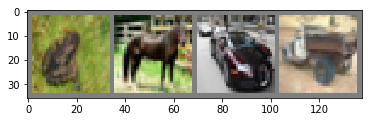

In [30]:
def imshow(img):
    img = img / 2 + 0.5 # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    
# Get random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show images
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4))) # Show labels

#### Define a Convolutional Neural Network

In [31]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.cuda()

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

#### Define a loss function and optimizer

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### Train the network

In [40]:
for epoch in range(5):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 1.472
[1,  4000] loss: 1.486
[1,  6000] loss: 1.472
[1,  8000] loss: 1.483
[1, 10000] loss: 1.473
[1, 12000] loss: 1.468
[2,  2000] loss: 1.423
[2,  4000] loss: 1.421
[2,  6000] loss: 1.442
[2,  8000] loss: 1.449
[2, 10000] loss: 1.423
[2, 12000] loss: 1.430
[3,  2000] loss: 1.377
[3,  4000] loss: 1.400
[3,  6000] loss: 1.380
[3,  8000] loss: 1.397
[3, 10000] loss: 1.409
[3, 12000] loss: 1.410
[4,  2000] loss: 1.350
[4,  4000] loss: 1.337
[4,  6000] loss: 1.372
[4,  8000] loss: 1.356
[4, 10000] loss: 1.384
[4, 12000] loss: 1.379
[5,  2000] loss: 1.308
[5,  4000] loss: 1.322
[5,  6000] loss: 1.318
[5,  8000] loss: 1.347
[5, 10000] loss: 1.352
[5, 12000] loss: 1.323
Finished Training


#### Test the network on the test data

GroundTruth:    cat  ship  ship plane


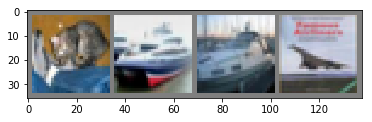

In [41]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [43]:
outputs = net(Variable(images.cuda()))

In [44]:
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   deer  ship   car truck


In [46]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    labels = labels.cuda()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 48 %


In [48]:
# Check class wise accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    labels = labels.cuda()
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 47 %
Accuracy of   car : 64 %
Accuracy of  bird : 16 %
Accuracy of   cat : 43 %
Accuracy of  deer : 48 %
Accuracy of   dog : 30 %
Accuracy of  frog : 55 %
Accuracy of horse : 69 %
Accuracy of  ship : 62 %
Accuracy of truck : 42 %


## Data Parallelism

In [49]:
from torch.utils.data import Dataset, DataLoader

In [50]:
# Parameters and DataLoaders
input_size = 5
output_size = 2

batch_size = 30
data_size = 100

In [51]:
# Dummy Dataset
class RandomDataset(Dataset):

    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.len

rand_loader = DataLoader(dataset=RandomDataset(input_size, 100),
                         batch_size=batch_size, shuffle=True)

In [52]:
class Model(nn.Module):

    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, input):
        output = self.fc(input)
        print("  In Model: input size", input.size(),
              "output size", output.size())

        return output

In [53]:
model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  model = nn.DataParallel(model)

if torch.cuda.is_available():
   model.cuda()

In [54]:
for data in rand_loader:
    if torch.cuda.is_available():
        input_var = Variable(data.cuda())
    else:
        input_var = Variable(data)

    output = model(input_var)
    print("Outside: input size", input_var.size(),
          "output_size", output.size())

  In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
  In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
  In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
  In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
